# <span style="color: #5A9BDC;">Exploratory Data Analysis of DVD Rental Data</span>

> **Author** Jenn Kang  
> **Date:** December 2025

## <span style="color: #5A9BDC;">Introduction </span>
* This notebook demonstrates my use of PostgreSQL to translate business questions into efficient SQL queries.
* This notebook demonstrates my SQL capability in PostgreSQL by querying the dvdrental database using:
    * Multi-table JOINs
    * CTEs
    * Subqueries
    * Aggregations
    * Window functions
    * Analysing business metrics (revenue, customer spending, and rental behaviour).
* There are 20 questions in total with increasing difficulty.
* The database (dvdrental) is a sample database simulating a movie rental business.

## <span style="color: #5A9BDC;">Exploratory Data Analysis</span>
### <span style="color: #5A9BDC;">Level 1</span>
#### Question 1
List all films with their title, release year, and rental rate.

```sql
SELECT title, release_year, rental_rate
FROM film
ORDER BY rental_rate DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/PitZczT.png"/>
</div>

#### Question 2
Find the total number of customers.

```sql
SELECT COUNT(*) AS tot_customer
FROM customer;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/ylE5xIr.png""/>
</div>

#### Question 3
Show the top 10 longest films by length.

```sql
SELECT title, length
FROM film
ORDER BY length DESC
LIMIT 10;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/RuQOU0e.png"/>
</div>

#### Question 4
Count how many films exist in each rating category.

```sql
SELECT rating, COUNT(*) AS tot_films
FROM film
GROUP BY 1
ORDER BY tot_films DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/0FQ90Nu.png"/>
</div>

#### Question 5
List all customers who live in United Kingdom (include name and city).

```sql
SELECT
	cu.customer_id
	, first_name ||' '|| last_name AS customer
	, ci.city
	, country
FROM customer as cu
JOIN address a
	ON cu.address_id = a.address_id
JOIN city ci
	ON a.city_id = ci.city_id
JOIN country co
	ON ci.country_id = co.country_id
WHERE country = 'United Kingdom';
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/8dxF5RU.png"/>
</div>

### <span style="color: #5A9BDC;">Level 2</span>
#### Question 6
Show total number of rentals per customer (customer name + rental count).

```sql
SELECT
	first_name ||' '|| last_name AS customer
	, COUNT(rental_id) AS rental_count
FROM customer c
JOIN rental r
	ON c.customer_id = r.customer_id
GROUP BY 1
ORDER BY rental_count DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/3kt0dwi.png"/>
</div>

#### Question 7
Find the top 5 most rented films.

```sql
SELECT
	title
	, COUNT(rental_id) AS tot_rented
FROM film f
JOIN inventory i
	ON f.film_id = i.film_id
JOIN rental r
	ON i.inventory_id = r.inventory_id
GROUP BY 1
ORDER BY tot_rented DESC
LIMIT 5;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/5G3fNrF.png"/>
</div>

#### Question 8
Calculate total revenue generated per film.

```sql
SELECT
	title
	, SUM(amount) AS tot_revenue
FROM payment p
JOIN rental r
	ON p.rental_id = r.rental_id
JOIN inventory i
	ON r.inventory_id = i.inventory_id
JOIN film f
	ON i.film_id = f.film_id
GROUP BY 1
ORDER BY tot_revenue DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/VForC01.png"/>
</div>

#### Question 9
Show average rental duration for each film category.

```sql
SELECT
	rating
	, ROUND(AVG(rental_duration),2) AS avg_rental_duration
FROM
	film
GROUP BY 1
ORDER BY avg_rental_duration DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/20VWPVG.png"/>
</div>

#### Question 10
Find customers who have rented more than 30 times.

```sql
SELECT
	c.customer_id
	, first_name ||' '|| last_name AS customer
	, COUNT(rental_id) AS tot_rented
FROM
	customer c
JOIN
	rental r
	ON	c.customer_id = r.customer_id
GROUP BY 1, 2
HAVING
	COUNT(rental_id) > 30
ORDER BY tot_rented DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/HFeOihG.png"/>
</div>

### <span style="color: #5A9BDC;">Level 3</span>
#### Question 11
Calculate total revenue by country.

```sql
SELECT
	country
	, SUM(amount) AS tot_revenue
FROM payment p
JOIN customer c
	ON p.customer_id = c.customer_id
JOIN address a
	ON c.address_id = a.address_id
JOIN city ci
	ON a.city_id = ci.city_id
JOIN country co
	ON ci.country_id = co.country_id
GROUP BY 1
ORDER BY tot_revenue DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/Y5PBpC9.png"/>
</div>

#### Question 12
Identify the top 3 customers by total spend.

```sql
SELECT
	c.customer_id
	, first_name ||' '|| last_name AS customer_name
	, SUM(amount) AS tot_spent
FROM payment p
JOIN customer c
	ON p.customer_id = c.customer_id
GROUP BY 1,2
ORDER BY tot_spent DESC
LIMIT 3;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/cNXXQVW.png"/>
</div>

#### Question 13
For each store, show: total rentals and total revenue.

```sql
SELECT
	store_id
	, COUNT(r.rental_id) AS tot_rentals
	, SUM(amount) AS tot_revenue
FROM payment p
JOIN rental r
	ON p.rental_id = r.rental_id
JOIN staff s
	ON r.staff_id = s.staff_id
GROUP BY 1
ORDER BY store_id;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/a66UTE3.png"/>
</div>

#### Question 14
Find films that have never been rented.

**Initial Query**
```sql
SELECT
	DISTINCT f.film_id
	, title
FROM film f
LEFT JOIN inventory i
	ON f.film_id = i.film_id
LEFT JOIN rental r
ON i.inventory_id = r.inventory_id
WHERE r.rental_id IS NULL;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/EBlba65.png"/>
</div>

I conducted a quick verification by finding the reverse (total number of films that **have** been rented:
* Calculated the total number of unique films rented (958).
* Compared it to the total number of unique films (1000).

**Verification:**
*Total Unique Films Rented*

```sql
SELECT
	COUNT(DISTINCT f.title)
FROM rental r
JOIN inventory i
	ON r.inventory_id = i.inventory_id
JOIN film f
	ON i.film_id = f.film_id;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/2xrO7vF.png"/>
</div>

*Total Unique Films in Films Table*

```sql
SELECT COUNT(*) FROM film;
```

**Output:**
<div align="left">
    <img src="https://i.imgur.com/5kpH9zG.png"/>
</div>

After verification, I found that the difference (42) does not match my initial query (43) so I conducted an investigation into the root cause.

**Investigation**

```sql
SELECT
	DISTINCT f.film_id
	, title
	, i.inventory_id AS i_inv_id
	, r.rental_id
FROM film f
LEFT JOIN inventory i
	ON f.film_id = i.film_id
LEFT JOIN rental r
ON i.inventory_id = r.inventory_id
WHERE r.rental_id IS NULL;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/jhbcybU.png"/>
</div>

* Through investigation, I found that film_id 1 had an inventory_id but no rental_id (null).
    * This means that this specific film copy (inventory_id 5) has never been rented out, however it does not mean that the film (film_id 1) has never been rented out.
    * This was included in the output as the query did not check for rental_id by unique film_id.
* Therefore, I reconstructed my query to answer this question.

**Final Query**

```sql
SELECT
	f.film_id
	, f.title
FROM film f
LEFT JOIN inventory i
	ON f.film_id = i.film_id
LEFT JOIN rental r
	ON i.inventory_id = r.inventory_id
GROUP BY 1,2
HAVING COUNT(r.rental_id) = 0
ORDER BY f.film_id;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/HUBsC3f.png"/>
</div>

#### Question 15
Determine which staff member processed the most payments.

```sql
SELECT
	s.staff_id
	, first_name ||' '|| last_name AS staff_name
	, COUNT(payment_id) AS tot_processed
FROM payment p
JOIN staff s
	ON p.staff_id = s.staff_id
GROUP BY 1,2
ORDER BY tot_processed DESC
LIMIT 1;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/XtZn3dd.png"/>
</div>

### <span style="color: #5A9BDC;">Level 4</span>
### Question 16 
Rank films within each category by total revenue.

```sql
SELECT
	title
	, rating
	, RANK() OVER(PARTITION BY rating ORDER BY SUM(amount) DESC) AS revenue_rank
	, SUM(amount) AS tot_revenue
FROM payment p
JOIN rental r
	ON p.rental_id = r.rental_id
JOIN inventory i
	ON r.inventory_id = i.inventory_id
JOIN film f
	ON i.film_id = f.film_id
GROUP BY 1,2;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/6edXWua.png"/>
</div>

#### Question 17
Find the monthly rental trend (year + month, rental count).

```sql
SELECT
	EXTRACT(YEAR FROM rental_date) AS rental_year
    , EXTRACT(MONTH FROM rental_date) AS rental_month
	, COUNT(rental_id) AS tot_rentals
FROM rental
GROUP BY 1,2
ORDER BY 1,2;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/YLL8jjw.png"/>
</div>

#### Question 18
Identify customers whose total spend is above the average customer spend.

```sql
WITH customer_spending AS (
	SELECT
		customer_id
		, SUM(amount) AS tot_spend
	FROM payment
	GROUP BY 1
)

SELECT
	customer_id
	, tot_spend
FROM customer_spending
WHERE tot_spend > (
	SELECT AVG(tot_spend) FROM customer_spending
)
ORDER BY tot_spend DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/MNof1Nr.png"/>
</div>

#### Question 19
For each customer, calculate the time (in days) between their first and last rental.

```sql
SELECT
	customer_id
	, EXTRACT(DAY FROM (MAX(rental_date) - MIN(rental_date))) AS days_between
FROM rental
GROUP BY 1
ORDER BY 2 DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/kDAfeqY.png"/>
</div>

### <span style="color: #5A9BDC;">Level 5</span>
#### Question 20
Classify customers into:
* Low spender
* Medium spender
* High spender
Based on total lifetime spend, and show the count in each segment.

**Identify total spending range:**

```sql
WITH payment_totals AS(
	SELECT
		customer_id
		, SUM(amount) AS tot_spend
	FROM payment
	GROUP BY 1
)

SELECT
	MIN(tot_spend) AS min_spend
	, MAX(tot_spend) AS max_spend
FROM payment_totals;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/mluofnd.png"/>
</div>

**Findings:**
* The range of customer total spending is $27.93 - $211.55
* To simplify the categories I will round the min and max values and split the 3 categories in even thirds.
* Customer classification will be done as per the following:
    * Low spender: $0 – $70
    * Medium spender: $70 - $140
    * High Spender: $140+

**Final code:**

```sql
WITH customer_spending AS(
	SELECT
	customer_id
	, SUM(amount) AS tot_spend
	FROM payment
	GROUP BY 1
)

, customer_categories AS(
	SELECT
		customer_id
		, CASE
			WHEN tot_spend <= 70 THEN 'Low Spender'
			WHEN tot_spend BETWEEN 70 AND 140 THEN 'Medium Spender'
			ELSE 'Heavy Spender'
		END AS customer_category
	FROM customer_spending
)

SELECT
	customer_category
	, COUNT(*) AS tot_customers
FROM customer_categories
GROUP BY 1
ORDER BY COUNT(*) DESC;
```
**Output:**
<div align="left">
    <img src="https://i.imgur.com/MGUa0Ta.png"/>
</div>
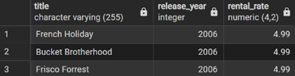
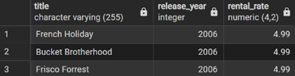